In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/wine-dataset-for-clustering/wine-clustering.csv


In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split
from sklearn.manifold import TSNE
from umap import UMAP
import PIL
import PIL.Image
from sklearn.cluster import KMeans

In [2]:
df = pd.read_csv('/kaggle/input/wine-dataset-for-clustering/wine-clustering.csv')
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
df.isnull().sum().sort_values(ascending=False)

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

In [5]:
X = df.to_numpy()

In [6]:
X.shape

(178, 13)

In [7]:
train_X = X[:100,:]
test_X = X[100:,:]

In [8]:
train_X.shape

(100, 13)

In [9]:
test_X.shape

(78, 13)

In [10]:
X_standard = StandardScaler().fit_transform(X)
feat_cols = ['feature'+str(i) for i in range(X_standard.shape[1])]
normalised_x = pd.DataFrame(X,columns=feat_cols)
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(X_standard)
pca_df = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2', 'principal component 3'])
pca_df.head()

,principal component 1,principal component 2,principal component 3
0,3.316751,-1.443463,-0.165739
1,2.209465,0.333393,-2.026457
2,2.516740,-1.031151,0.982819
3,3.757066,-2.756372,-0.176192
4,1.008908,-0.869831,2.026688


In [11]:
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.36198848 0.1920749  0.11123631]


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  


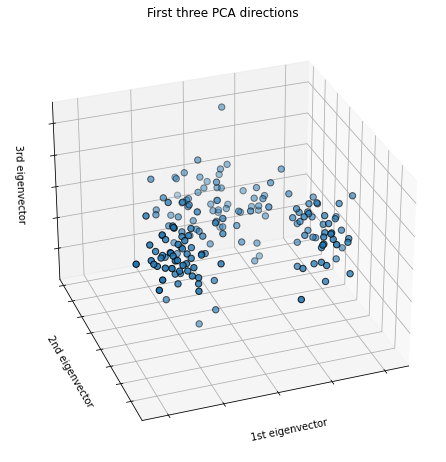

In [13]:
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
ax.scatter(
    principalComponents[:, 0],
    principalComponents[:, 1],
    principalComponents[:, 2],
    cmap=plt.cm.Set1,
    edgecolor="k",
    s=40,
)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])

plt.show()

In [14]:
embedded_X = TSNE(n_components=2, learning_rate=50)
tsne_features = embedded_X.fit_transform(X_standard)
df['tsne-2d-one'] = tsne_features[:,0]
df['tsne-2d-two'] = tsne_features[:,1]


/opt/conda/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,


<AxesSubplot:xlabel='tsne-2d-one', ylabel='tsne-2d-two'>

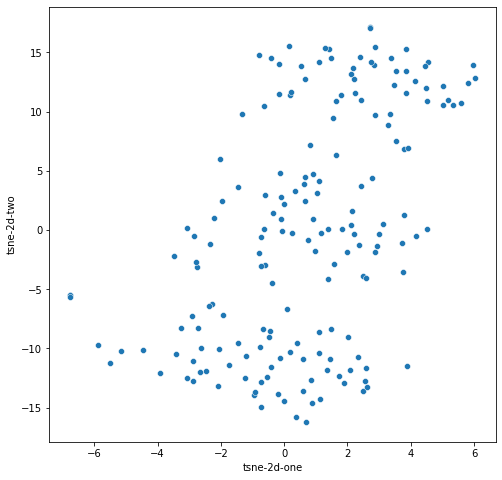

In [15]:
plt.figure(figsize=(8,8))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    data=df,
    legend="full",
    palette="deep"
)

k=3 for three clusters

In [17]:
kmeans = KMeans(n_clusters=3, random_state=1234).fit(train_X)
print(kmeans.labels_)

print(kmeans.cluster_centers_)

[2 2 1 1 2 1 1 1 2 2 1 1 1 1 1 1 1 2 1 2 2 2 2 2 2 2 1 1 2 2 1 1 2 1 2 2 2
 2 2 2 2 2 2 0 2 2 2 2 2 1 1 1 1 1 2 2 2 1 1 0 0 0 0 0 0 0 0 0 2 0 2 0 0 2
 2 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0]
[[1.24100000e+01 1.72833333e+00 2.21472222e+00 1.92750000e+01
  9.27500000e+01 2.20611111e+00 1.97944444e+00 3.51111111e-01
  1.52861111e+00 3.33361111e+00 1.14250000e+00 2.67722222e+00
  5.12666667e+02]
 [1.38632000e+01 1.78880000e+00 2.48360000e+00 1.66600000e+01
  1.04840000e+02 2.94040000e+00 3.14040000e+00 2.98800000e-01
  2.00080000e+00 6.26320000e+00 1.10680000e+00 3.01840000e+00
  1.32348000e+03]
 [1.35000000e+01 1.99358974e+00 2.41333333e+00 1.77794872e+01
  1.10282051e+02 2.72128205e+00 2.72538462e+00 2.88461538e-01
  1.84384615e+00 4.71820513e+00 1.04143590e+00 3.15820513e+00
  9.54820513e+02]]


In [18]:
print(kmeans.score(train_X))
print(kmeans.score(test_X))

-1523293.503943248
-1186134.6970657294
